In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### Loading data

In [ ]:
df = pd.read_csv("data/housing.csv")

Visualising the head (top 5)

In [ ]:
df.head()

Show samples (and possible misses)

In [101]:
df.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           19143
total_bedrooms        19162
population            19243
households            19223
median_income         19763
median_house_value    19369
ocean_proximity       20433
dtype: int64

What them features do?

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block
7. households: Total number of households, a group of people residing within a home unit, for a block
8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
10. oceanProximity: Location of the house w.r.t ocean/sea

In [ ]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

### Plotting Graph Functions (self made)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    # Select columns to plot
    columns = df.select_dtypes(include=[np.number]).columns[:nGraphShown]
    
    # Calculate number of rows needed
    nGraphRow = (len(columns) - 1) // nGraphPerRow + 1
    
    # Create subplots with larger figure size
    fig, axes = plt.subplots(nGraphRow, nGraphPerRow, figsize=(7*nGraphPerRow, 6*nGraphRow))
    axes = axes.flatten() if nGraphRow > 1 or nGraphPerRow > 1 else [axes]
    
    for i, col in enumerate(columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'{col} Distribution', fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)
        axes[i].tick_params(labelsize=8)
    
    # Remove any unused subplots
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def plotCorrelationMatrix(df):
    # Select numerical columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    if len(numeric_columns) < 2:
        print("Error: The DataFrame must have at least two numeric columns to create a correlation matrix.")
        return
    
    # Create a new dataframe with numeric columns
    df_numeric = df[numeric_columns]
    
    # Handle missing values
    df_numeric = df_numeric.dropna()
    
    # Calculate the correlation matrix
    corr_matrix = df_numeric.corr()
    
    # Mask the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Create a larger figure for better visibility
    plt.figure(figsize=(12, 10))
    
    # Create a heatmap of the correlation matrix with the mask
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    
    plt.title('Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Print information about non-numeric columns
    non_numeric_columns = [col for col in df.columns if col not in numeric_columns]
    if non_numeric_columns:
        print("\nNon-numeric columns excluded from the correlation matrix:")
        for col in non_numeric_columns:
            print(f"- {col} (type: {df[col].dtype})")

def plotScatterMatrix(df, plotSize, textSize):
    # Keep only numerical columns
    df = df.select_dtypes(include=[np.number])
    
    # Remove columns with NaN values
    df = df.dropna(axis=1)
    
    # Keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]]
    
    # Limit to 10 columns
    columnNames = list(df.columns)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    
    # Create the scatter matrix
    fig, ax = plt.subplots(nrows=len(columnNames), ncols=len(columnNames), figsize=(plotSize, plotSize))
    pd.plotting.scatter_matrix(df, alpha=0.75, diagonal='kde', ax=ax)
    
    # Add correlation coefficients
    corrs = df.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', (0.8, 0.2), 
                          xycoords='axes fraction', ha='center', va='center', 
                          size=textSize)
    
    plt.suptitle('Scatter and Density Plot', fontsize=textSize*1.5)
    plt.tight_layout()
    plt.show()

In [ ]:
plotPerColumnDistribution(df, 10, 5)

In [ ]:
plotCorrelationMatrix(df)

In [ ]:
plotScatterMatrix(df, 20, 10)

<center><font size=11> CH2. Finding (& visualising) missings </font> </center>


### 2.1 Numerical Summary

In [102]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms           1290
total_bedrooms        1271
population            1190
households            1210
median_income          670
median_house_value    1064
ocean_proximity          0
dtype: int64

In [103]:
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent
get_numerical_summary(df)

total_rooms : 1290 (6.313%)
total_bedrooms : 1271 (6.22%)
population : 1190 (5.824%)
households : 1210 (5.922%)
median_income : 670 (3.279%)
median_house_value : 1064 (5.207%)


{'total_rooms': 6.313316693583908,
 'total_bedrooms': 6.22032985856213,
 'population': 5.823912298732443,
 'households': 5.921793177702736,
 'median_income': 3.2790094455048204,
 'median_house_value': 5.207262761219596}

### 2.2 Matrix

In [ ]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

### 2.3 Nullify Correlation
vergelijkt alleen columns met missing data (useful bij >1 columns w NAN/Missing)

<Axes: >

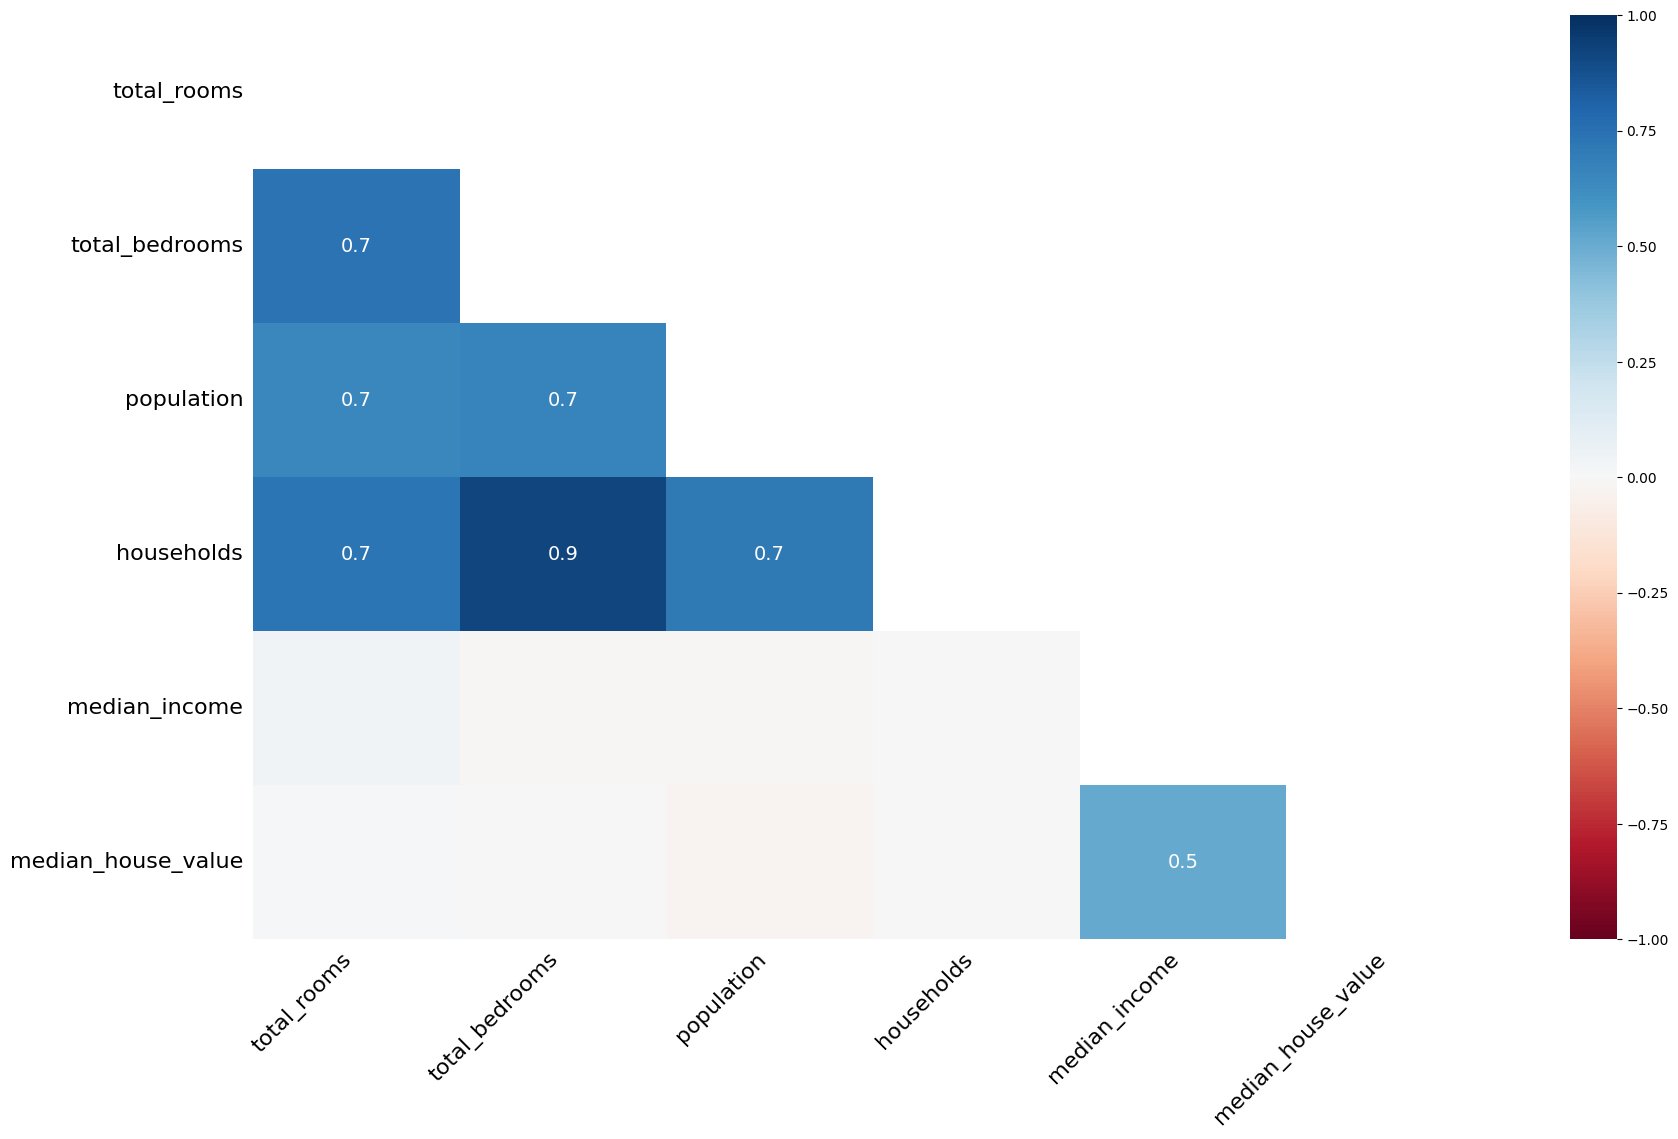

In [104]:
msno.heatmap(df, labels = True)

### 2.4 Dendrogram
WIP

<center><font size=11> CH3 Cleaning the data</font> </center>

### 3.1 MISSINGS

Drop de rows in een specifieke subset (COL) met NA values 

In [116]:
df = df.dropna(subset=['total_bedrooms'])

In [117]:
df.count()

longitude             17434
latitude              17434
housing_median_age    17434
total_rooms           17434
total_bedrooms        17434
population            17434
households            17434
median_income         17434
median_house_value    17434
ocean_proximity       17434
dtype: int64

### 3.2 OUTLIERS

<font color=green size=6> Plotting </font>  <font size=6> Boxplots </font>

> 1 columns showing incorrect? NAN's.


In [ ]:
def plot_numeric_boxplots(df):
    """
    Plot boxplots for all numeric columns in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    None
    """
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=[np.number])

    # Determine the number of numeric columns
    num_columns = len(df_numeric.columns)

    # Calculate the number of rows needed, 3 columns per row
    num_rows = (num_columns + 2) // 3

    # Create the subplots dynamically
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

    # Flatten the axes array to iterate over each subplot
    axes = axes.flatten()

    # Plot boxplots for each numeric column
    for i, col in enumerate(df_numeric.columns):
        axes[i].boxplot(df_numeric[col].dropna(), vert=True)  # Drop NaN values for plotting
        axes[i].set_title(f'Boxplot of {col.capitalize()}')
        axes[i].set_ylabel('')  # Remove y-label for cleaner presentation

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_numeric_boxplots(df)

<font color=red size=6> Cleaning </font>  <font size=6> Boxplots </font>

* to research

In [99]:
# Function to remove outliers based on IQR
def remove_outliers(df):
    cleaned_data = pd.DataFrame()
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Checking numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)][col]
        else:
            cleaned_data[col] = df[col]  # Non-numeric columns remain unchanged
    return cleaned_data
# Applying outlier removal function to the entire dataset
df = remove_outliers(df)

In [118]:
df.count()

longitude             17434
latitude              17434
housing_median_age    17434
total_rooms           17434
total_bedrooms        17434
population            17434
households            17434
median_income         17434
median_house_value    17434
ocean_proximity       17434
dtype: int64

In [ ]:
df = df.dropna(subset=['households'])

In [120]:
df.count() #rinse and repeat

longitude             17434
latitude              17434
housing_median_age    17434
total_rooms           17434
total_bedrooms        17434
population            17434
households            17434
median_income         17434
median_house_value    17434
ocean_proximity       17434
dtype: int64

<font color=red size=6> TO DO: </font>  
<font size=3>
* After outliers, many NAN's 
* NU manual meerdere rows met NA's gedropt tot same value op df.count. MAAK FUNCTION

</font>


<center> <font size=11> CH4. LABEL ENCODING </font> </center>